In [9]:
import pickle 

uttid = 'en.20080924.31.3-249_0.0_4.2'
minimal_splitting_pmi = -100

span_pkl = f'/data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/s2u_en-es/spans/en-test_epst-utt{uttid}-minspan5_minsplitpmi{minimal_splitting_pmi}.pkl'
word_seg_pkl = '/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/mfa_s2u_manifests/s2u_en-es/en-test_epst-word_seg.pkl'
phones_seg_pkl = '/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/mfa_s2u_manifests/s2u_en-es/en-test_epst-phones_seg.pkl'
tsv_file = '/data/sls/scratch/clai24/lexicon/exp/hubert_kmeans/s2u_en-es/en-test_epst.tsv'
save_pth = f'/data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/s2u_en-es/viz/en-test_epst-utt{uttid}-minspan5_minsplitpmi{minimal_splitting_pmi}.png'

def read_tsv(): 
    import os 
    return os.path.join('/data/sls/temp/clai24/data/speech_matrix/eval_data/europarl_st/fairseq_processed/audios/en/', f"{uttid}.wav")
    import csv
    with open(tsv_file, 'r', newline='') as file:
        reader = csv.reader(file, delimiter='\t')
        next(reader)
        
        rows = []
        for row in reader:
            rows.append(row[0])
    return rows[uttid]


def read_parse_pickle(): 
    with open(span_pkl, "rb") as file:
        my_dict = pickle.load(file)
#         my_list = [x[0] for x in my_list]
#         my_list = [(x[0]/hubert_sample_rate, x[1]/hubert_sample_rate) for x in my_list]
        my_dict = {window_id:[(x[0][0]/hubert_sample_rate, x[0][1]/hubert_sample_rate) for x in my_list] for window_id, my_list in my_dict.items()}
    return my_dict

def read_segmentation_pickle(seg_pkl): 
    with open(seg_pkl, "rb") as file:
        utt2seg = pickle.load(file)
    return utt2seg[uttid]

hubert_sample_rate = 50 # 50 Hz
wav_file = read_tsv()
oracle_word_seg = read_segmentation_pickle(word_seg_pkl)
oracle_phone_seg = read_segmentation_pickle(phones_seg_pkl)
my_dict = read_parse_pickle()

In [10]:
my_dict

{0: [(0.0, 1.98),
  (0.0, 1.38),
  (1.4, 1.98),
  (0.0, 0.28),
  (0.3, 1.38),
  (0.0, 0.08),
  (0.1, 0.28),
  (0.3, 0.38),
  (0.4, 1.38),
  (0.4, 0.58),
  (0.6, 1.38)],
 1: [(2.0, 3.98),
  (2.0, 2.78),
  (2.8, 3.98),
  (2.0, 2.28),
  (2.3, 2.78),
  (2.8, 2.88),
  (2.9, 3.98),
  (2.0, 2.08),
  (2.1, 2.28)],
 2: [(4.0, 4.16)]}

In [27]:
oracle_phone_seg

[('', 0.0, 0.25),
 ('IH1', 0.25, 0.29),
 ('T', 0.29, 0.34),
 ('S', 0.34, 0.38),
 ('OW1', 0.38, 0.52),
 ('N', 0.52, 0.55),
 ('L', 0.55, 0.58),
 ('IY0', 0.58, 0.66),
 ('G', 0.66, 0.8),
 ('R', 0.8, 0.92),
 ('IY1', 0.92, 1.07),
 ('D', 1.07, 1.16),
 ('', 1.16, 1.22),
 ('Y', 1.22, 1.29),
 ('UW0', 1.29, 1.33),
 ('F', 1.33, 1.45),
 ('AO1', 1.45, 1.52),
 ('R', 1.52, 1.62),
 ('IY0', 1.62, 1.68),
 ('AH0', 1.68, 1.76),
 ('AE1', 1.76, 1.97),
 ('N', 1.97, 2.03),
 ('D', 2.03, 2.1),
 ('', 2.1, 2.28),
 ('CH', 2.28, 2.39),
 ('IY1', 2.39, 2.45),
 ('P', 2.45, 2.5),
 ('M', 2.5, 2.6),
 ('AH1', 2.6, 2.69),
 ('N', 2.69, 2.74),
 ('IY0', 2.74, 2.85),
 ('', 2.85, 2.89),
 ('T', 2.89, 2.95),
 ('AH0', 2.95, 2.98),
 ('B', 2.98, 3.05),
 ('IY0', 3.05, 3.11),
 ('B', 3.11, 3.16),
 ('L', 3.16, 3.24),
 ('EY1', 3.24, 3.29),
 ('M', 3.29, 3.32),
 ('D', 3.32, 3.35),
 ('F', 3.35, 3.41),
 ('R', 3.41, 3.45),
 ('ER0', 3.45, 3.48),
 ('DH', 3.48, 3.52),
 ('AH0', 3.52, 3.57),
 ('HH', 3.57, 3.64),
 ('OW1', 3.64, 3.7),
 ('L', 3.7, 3.7

In [14]:
from collections import defaultdict

def check_total_dict_items(dict): 
    total_item = 0
    for v in dict.values(): 
        total_item += len(v)
    
    return total_item    

def partition_spans(span_list): 
    """ partition a list of spans into different levels 
    each level partition either has multiples of 2 spans, 
    e.g. 0, 2, 4, ...
    
    This function will be useful for plotting spans on top of the spectrograms
    """
    total_spans = len(span_list)
    out = {}
    level = 0 
    root = span_list.pop(0)
    out[level] = [root]
    level += 1
    
    while len(span_list) > 0: 
        span1 = span_list.pop(0)
        span2 = span_list.pop(0)
        current_level_spans = [span1, span2]
        curr_end = max(span1[1], span2[1])
        
        while current_level_spans != []:
#             print(out)
#             print(span_list)
#             print(current_level_spans)
            # take a peak to see if we reach the end 
            if len(span_list) > 0 and curr_end > span_list[0][0]: 
                out[level] = current_level_spans
                level += 1
                current_level_spans = []
            # if not, continue popping 
            elif len(span_list) > 0 and curr_end <= span_list[0][0]:
                span1 = span_list.pop(0)
                span2 = span_list.pop(0)
                current_level_spans.extend([span1, span2])
                curr_end = max(span1[1], span2[1])
            else: 
                # edge case: span_list is empty but there are still 
                # items in current_level_spans
                out[level] = current_level_spans
                current_level_spans = []
                
    assert check_total_dict_items(out) == total_spans
    
    return out 
  
    
merged_span_levels = defaultdict(list)
dicts = []
for window_id, my_list in my_dict.items():
    window_span_levels = partition_spans(my_list) 
    dicts.append(window_span_levels)

# Loop through each dictionary and merge the values with the same keys
for d in dicts:
    for key, values in d.items():
        merged_span_levels[key].extend(values)
    
# Convert the defaultdict back to a regular dictionary
span_levels = dict(merged_span_levels)

print(span_levels)

{0: [(0.0, 1.98), (2.0, 3.98), (4.0, 4.16)], 1: [(0.0, 1.38), (1.4, 1.98), (2.0, 2.78), (2.8, 3.98)], 2: [(0.0, 0.28), (0.3, 1.38), (2.0, 2.28), (2.3, 2.78), (2.8, 2.88), (2.9, 3.98)], 3: [(0.0, 0.08), (0.1, 0.28), (0.3, 0.38), (0.4, 1.38), (2.0, 2.08), (2.1, 2.28)], 4: [(0.4, 0.58), (0.6, 1.38)]}


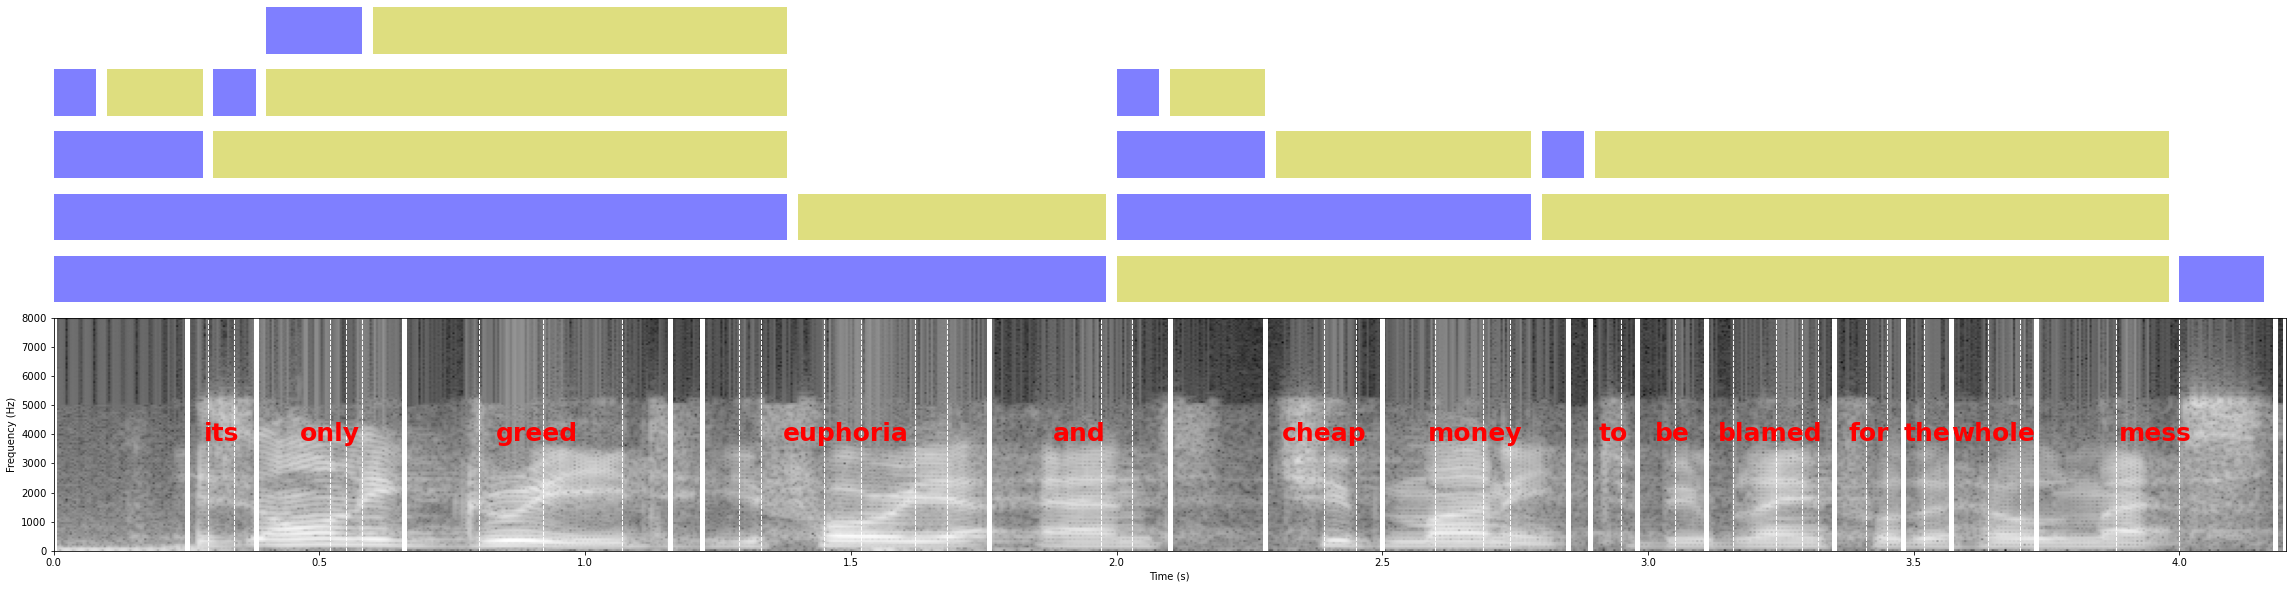

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

def plot(span_levels, word_time_indices, phone_time_indices):
    # Load the waveform from a FLAC file
    waveform, sample_rate = sf.read(wav_file)

    # Calculate the spectrogram using the specgram function
    NFFT = 256  # Size of FFT window
    window = np.hamming(NFFT)  # Window function
    noverlap = int(0.75 * NFFT)  # Overlap between windows

    # Set the figure size and create a figure with multiple axes
    levels = len(span_levels.keys())
    height_ratios = [0.2] * levels
    height_ratios.append(1)
    fig, axes = plt.subplots(nrows=levels+1, figsize=(40, 2*levels), gridspec_kw={'height_ratios': height_ratios})
    
    # Plot the spectrogram on the first axis
    ax1 = axes[-1]
    spec, freqs, bins, im = ax1.specgram(waveform, NFFT=NFFT, Fs=sample_rate,
                                          window=window, noverlap=noverlap,
                                          cmap='gray', aspect=4)
  
    # plot word seg
    for word, start_time, end_time in word_time_indices:
        start_index = int(start_time * sample_rate)
        end_index = int(end_time * sample_rate)
        start_time = start_index / sample_rate
        end_time = end_index / sample_rate
        ax1.axvline(start_time, linestyle='-', color='w', linewidth=5)
        ax1.axvline(end_time, linestyle='-', color='w', linewidth=5)
        ax1.text((start_time+end_time)/2.0, 4000, word, ha='center', va='center', weight='bold', color='red', fontsize=25)
    for _, start_time, end_time in phone_time_indices:
        start_index = int(start_time * sample_rate)
        end_index = int(end_time * sample_rate)
        start_time = start_index / sample_rate
        end_time = end_index / sample_rate
        ax1.axvline(start_time, linestyle='--', color='w', linewidth=1)
        ax1.axvline(end_time, linestyle='--', color='w', linewidth=1)
    ax1.set_xlim(0.0, end_time) # get rid of excess beginning and ending spaces 
    
    # Add a span to each additional axis
    # with alternating colors     
    colors = ['b', 'y']
    for level_idx, spans in span_levels.items():
        axi = axes[-1-level_idx-1]
        for span_idx, span in enumerate(spans):
            color = colors[span_idx % 2]
            axi.axvspan(span[0], span[1], facecolor=color, alpha=0.5)
        axi.set_xlim(ax1.get_xlim())
        axi.set_axis_off()
    
    # Set the figure background and save the plot
    fig.patch.set_facecolor('white')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_xlabel('Time (s)')
    plt.savefig(save_pth, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
    plt.show()
    
plot(span_levels, oracle_word_seg, oracle_phone_seg)

/data/sls/scratch/clai24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


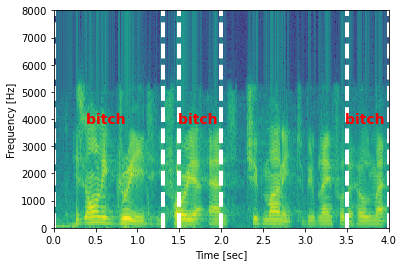

In [150]:
from scipy import signal

# Load waveform
samples, sample_rate = sf.read(wav_file)
# Define spectrogram parameters
nperseg = 256
noverlap = nperseg // 2
window = signal.windows.hamming(nperseg)

# Compute spectrogram using Welch's method
f, t, Sxx = signal.spectrogram(samples, fs=sample_rate, window=window, nperseg=nperseg, noverlap=noverlap)




# Define time indices in seconds
time_indices = [(0.0, 1.3), (1.5, 2.0), (3.5, 4.0)]

# Plot spectrogram
fig, ax = plt.subplots()
# im = ax.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='viridis')

# Overlay time indices on top of spectrogram
for start_time, end_time in time_indices:
    label = 'bitch '
    start_index = int(start_time * sample_rate)
    end_index = int(end_time * sample_rate)
    start_time = start_index / sample_rate
    end_time = end_index / sample_rate
    ax.axvline(start_time, linestyle='--', color='w', linewidth=4)
    ax.axvline(end_time, linestyle='--', color='w', linewidth=4)
    ax.text((start_time+end_time)/2.0, 4000, label, ha='center', va='center', weight='bold', color='red', fontsize=14)




ax.set_xlim(0.0, end_time)

# Plot spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
